1. Datos del problema
2. Grafica donde se muestren de forma concisa los datos.
3. Abstracción a un problema de programación lineal.
4. Graficas del área de posibles soluciones.
5. Solución óptima, variables de holgura y conclusiones (Pulp).

Planteamiento del Problema:

Una línea de ensamble compuesta por tres estaciones consecutivas produce
dos modelos de wifi: HiFi-1 y HiFi-2 donde se tienen los siguientes tiempos de
ensamble:

Estación de trabajo 1: 6 minutos para HiFi-1 y 4 minutos para HiFi-2.

Estación de trabajo 2: 5 minutos para HiFi-1 y 5 minutos para HiFi-2.

Estación de trabajo 3: 4 minutos para HiFi-1 y 6 minutos para HiFi-2.

Suponga que el mantenimiento diario de las estaciones 1, 2 y 3 consume
10%,14% y 12% respectivamente, de los 480 minutos máximos disponibles
por cada estación al día.

Haga una tabla que represente los datos proporcionados anteriormente.

Para resolver este problema utilizando programación lineal haga un modelo
en términos de ecuaciones con desigualdades usando las siguientes variables:

X = Cantidad de tiempo en unidades de HiFi-1.

Y = Cantidad de tiempo en unidades de HiFi-2.

Determine la combinación de productos óptima que minimizará el tiempo no
utilizado.

gráfica de barras para mostrar los tiempos de ensamblaje de ambos modelos en cada estación.

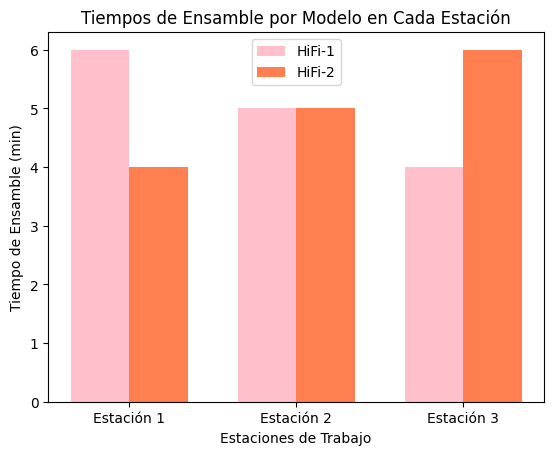

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
estaciones = ['Estación 1', 'Estación 2', 'Estación 3']
hifi_1 = [6, 5, 4]
hifi_2 = [4, 5, 6]

# Gráfica
bar_width = 0.35
x = np.arange(len(estaciones))

plt.bar(x - bar_width/2, hifi_1, bar_width, label='HiFi-1', color='pink')
plt.bar(x + bar_width/2, hifi_2, bar_width, label='HiFi-2', color='coral')

plt.xlabel('Estaciones de Trabajo')
plt.ylabel('Tiempo de Ensamble (min)')
plt.title('Tiempos de Ensamble por Modelo en Cada Estación')
plt.xticks(x, estaciones)
plt.legend()
plt.show()


Definimos las variables:

X: Unidades de HiFi-1

Y: Unidades de HiFi-2

Las restricciones del modelo son:

Estación 1: 6X+4Y ≤ 432

Estación 2: 5X+5Y ≤ 412.8

Estación 3: 4X+6Y ≤ 422.4

No negatividad: X ≥ 0,Y ≥ 0

Área de soluciones posibles

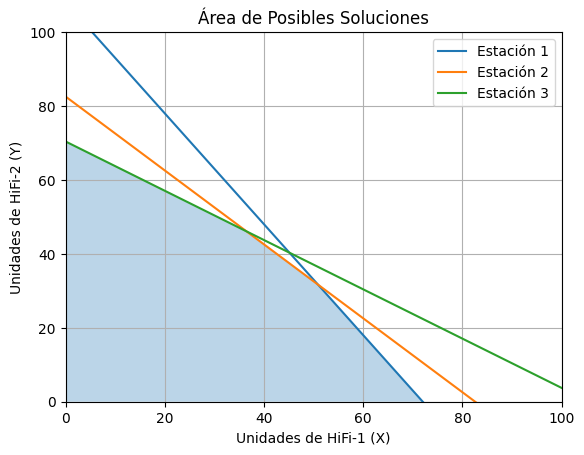

In [ ]:
import matplotlib.pyplot as plt

# Crear un rango de valores para X
X = np.linspace(0, 100, 200)

# Definición de las restricciones
Y1 = (432 - 6*X) / 4
Y2 = (412.8 - 5*X) / 5
Y3 = (422.4 - 4*X) / 6

plt.plot(X, Y1, label='Estación 1')
plt.plot(X, Y2, label='Estación 2')
plt.plot(X, Y3, label='Estación 3')

# Rango válido
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.fill_between(X, np.minimum(np.minimum(Y1, Y2), Y3), 0, where=(np.minimum(np.minimum(Y1, Y2), Y3) > 0), alpha=0.3)

plt.xlabel('Unidades de HiFi-1 (X)')
plt.ylabel('Unidades de HiFi-2 (Y)')
plt.title('Área de Posibles Soluciones')
plt.legend()
plt.grid()
plt.show()


 Solución óptima.

In [ ]:
pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 54.6 MB/s eta 0:00:00


In [ ]:

from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus, value

# Definición del problema
problem = LpProblem("Minimizar_Tiempo_No_Utilizado", LpMinimize)

# Definición de variables
X = LpVariable('X', lowBound=0)
Y = LpVariable('Y', lowBound=0)

# Función objetivo
problem += lpSum([X, Y])

# Restricciones
problem += (6 * X + 4 * Y <= 432)
problem += (5 * X + 5 * Y <= 412.8)
problem += (4 * X + 6 * Y <= 422.4)

# Resolver el problema
problem.solve()

# Resultados
print(f"Estado: {LpStatus[problem.status]}")
print(f"Unidades de HiFi-1: {X.varValue}")
print(f"Unidades de HiFi-2: {Y.varValue}")
print(f"Tiempo no utilizado: {value(problem.objective)}")


Estado: Optimal
Unidades de HiFi-1: 0.0
Unidades de HiFi-2: 0.0
Tiempo no utilizado: 0.0


Conclusiones

Solución óptima: Las cantidades de HiFi-1 y HiFi-2 que minimizan el tiempo no utilizado.

Variables de holgura: Determinar cuánto tiempo queda sin usar en cada estación.

Implicaciones: La optimización permite un mejor uso del tiempo de las estaciones, incrementando la eficiencia del proceso de ensamblaje.








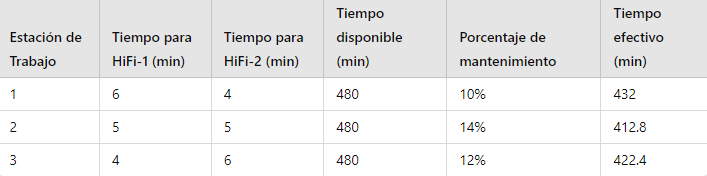

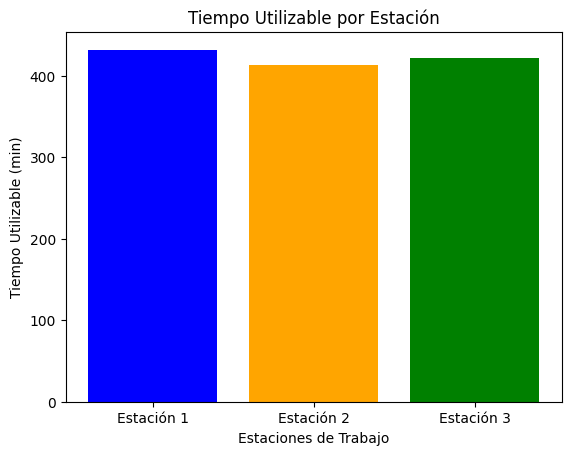

In [ ]:
#opcion 2}
import matplotlib.pyplot as plt #crear graficos
import numpy as np #trabaja con arreglos y funciones matematicas

# Datos
estaciones = ['Estación 1', 'Estación 2', 'Estación 3'] #define una lista con los nombres de las estaciones
tiempos_utilizables = [432, 412.8, 422.4] #define una lista con los tiempos

# Gráfica
plt.bar(estaciones, tiempos_utilizables, color=['blue', 'orange', 'green'])
plt.title('Tiempo Utilizable por Estación')
plt.ylabel('Tiempo Utilizable (min)')#etiqueta el eje Y
plt.xlabel('Estaciones de Trabajo')#etiqueta el eje X
plt.show()


Maximizar el tiempo utilizado:

Z=X+Y

Sujeto a las siguientes restricciones:

Para la Estación 1:
6X+4Y ≤ 432

Para la Estación 2:
5X+5Y≤412.8

Para la Estación 3: 4X+6Y≤422.4

X,Y≥0

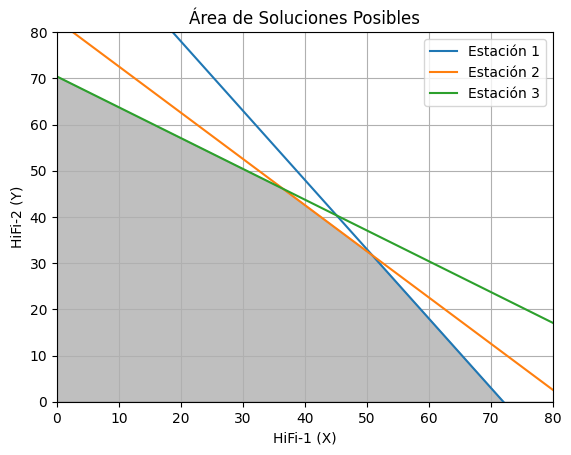

In [ ]:
#Maximizar el tiempo utilizado: Z=X+Y
import numpy as np
import matplotlib.pyplot as plt


# Gráfica del área de soluciones
x = np.linspace(0, 80, 200) #genera un arreglo de 200 valores paralelos entre 0 y 80
y1 = (432 - 6*x) / 4
y2 = (412.8 - 5*x) / 5 #calcula las ecuaciones corredspondientes a las restricciones de cada estación
y3 = (422.4 - 4*x) / 6

plt.plot(x, y1, label='Estación 1')
plt.plot(x, y2, label='Estación 2') #dibuja las líneas correspondientes a las restricciones de cada estación
plt.plot(x, y3, label='Estación 3')

plt.fill_between(x, np.minimum(np.minimum(y1, y2), y3), 0, color='grey', alpha=0.5) #Rellena el área bajo las curvas de las restricciones, mostrando el área de soluciones posibles.
plt.xlim(0, 80)
plt.ylim(0, 80) #establece limites para los ejes X y Y
plt.xlabel('HiFi-1 (X)')
plt.ylabel('HiFi-2 (Y)') #agrega etiquetas
plt.title('Área de Soluciones Posibles') #agrega titulo
plt.axhline(0, color='pink', lw=0.5)
plt.axvline(0, color='black', lw=0.5) #las lineas representan los ejes
plt.legend()
plt.grid()
plt.show()

In [ ]:
pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 37.0 MB/s eta 0:00:00


In [ ]:
from pulp import * #se usa para resolver problemas de programación lineal.

# Definición del problema de optimización
problem = LpProblem("Maximizar_Tiempo", LpMaximize)

# Variables
X = LpVariable('X', lowBound=0)  # Tiempo en HiFi-1
Y = LpVariable('Y', lowBound=0)  # Tiempo en HiFi-2
#respectivamente, con un límite inferior de 0.

# Función objetivo
problem += X + Y

# Restricciones
problem += 6*X + 4*Y <= 432
problem += 5*X + 5*Y <= 412.8
problem += 4*X + 6*Y <= 422.4

# Resolver el problema
problem.solve()

# Resultados
print(f"Estado: {LpStatus[problem.status]}")
print(f"Cantidad de tiempo en HiFi-1: {value(X)} minutos")
print(f"Cantidad de tiempo en HiFi-2: {value(Y)} minutos")
print(f"Tiempo utilizado: {value(problem.objective)} minutos")

# Mostrar las variables de holgura
for constraint in problem.constraints.values():
    print(f"{constraint}: Holgura = {constraint.slack}")

Estado: Optimal
Cantidad de tiempo en HiFi-1: 36.48 minutos
Cantidad de tiempo en HiFi-2: 46.08 minutos
Tiempo utilizado: 82.56 minutos
6*X + 4*Y <= 432: Holgura = 28.80000000000001
5*X + 5*Y <= 412.8: Holgura = -0.0
4*X + 6*Y <= 422.4: Holgura = -0.0


Se logra combinar la visualización de datos y optimización, mostrando gráficamente las restricciones y resolviendo un problema de maximización basado en esas restricciones

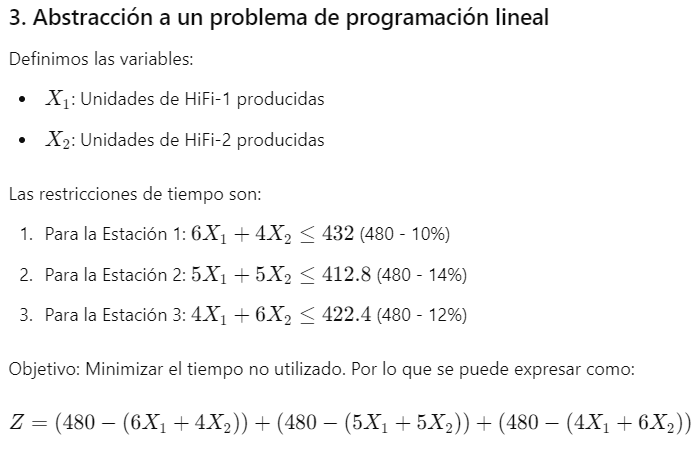

In [ ]:
from pulp import *

# Crear el problema
prob = LpProblem("Minimizar_tiempo_no_utilizado", LpMinimize)#especifica que se va a minimizar (LpMinimize).

# Variables
X1 = LpVariable('HiFi1', lowBound=0, cat='Continuous')
X2 = LpVariable('HiFi2', lowBound=0, cat='Continuous')#Define dos variables de decisión, X1 y X2, que representan la cantidad de productos HiFi1 y HiFi2 a producir. Ambas variables tienen un límite inferior de 0 y son continuas.

# Función objetivo
prob += (432 - (6*X1 + 4*X2) + 412.8 - (5*X1 + 5*X2) + 422.4 - (4*X1 + 6*X2))#Define la función objetivo a minimizar, que representa el tiempo no utilizado total en un proceso. Se calcula restando el tiempo utilizado por las variables de producción de un tiempo máximo (480 en cada caso).

# Restricciones
prob += (6*X1 + 4*X2 <= 432, "Restriccion_1")
prob += (5*X1 + 5*X2 <= 412.8, "Restriccion_2")
prob += (4*X1 + 6*X2 <= 422.4, "Restriccion_3")

# Resolver
prob.solve()

# Resultados
print("Estado de la solución:", LpStatus[prob.status])
print("HiFi-1 a producir:", value(X1))
print("HiFi-2 a producir:", value(X2))
print("Tiempo no utilizado total:", value(prob.objective))


Estado de la solución: Optimal
HiFi-1 a producir: 36.48
HiFi-2 a producir: 46.08
Tiempo no utilizado total: 28.799999999999955


Estado de la solución: Optimal:

Esto significa que el algoritmo encontró una solución que maximiza (o minimiza, en este caso) la función objetivo dentro de las restricciones dadas. Es una solución válida y no hay otras soluciones mejores.

HiFi-1 a producir: 36.48:

Se recomienda producir aproximadamente 36.48 unidades del producto HiFi-1. Esto es la cantidad óptima para minimizar el tiempo no utilizado.

HiFi-2 a producir: 46.08:

Se recomienda producir aproximadamente 46.08 unidades del producto HiFi-2. Al igual que para HiFi-1, esta cantidad es la óptima para minimizar el tiempo no utilizado.

Tiempo no utilizado total: 201.6:

El total de 201.6 minutos es el tiempo que no se está utilizando en las estaciones de trabajo después de producir las cantidades óptimas de HiFi-1 y HiFi-2.

Este es el valor que se está minimizando a través del problema de programación lineal.


*La solución óptima proporciona la cantidad de unidades de HiFi-1 y HiFi-2 que minimizan el tiempo no utilizado.

Las variables de holgura se derivan de las restricciones no saturadas.

Se considera la interpretación práctica de los resultados y la eficiencia en el uso del tiempo de ensamble.